# Hypothesis testing: Comprehensive Analysis in Base Pay Gap Based on Gender

# Introduction

The gender pay gap, a term denoting the difference in earnings between men and women, has captured the public's attention for decades. Over time, the pressing question arises: what is the current state of this issue? To address this, we turn our focus to the "Glassdoor Gender Pay Gap" dataset, obtained in 2020 from Glassdoor, a platform known for its provision of anonymous company reviews. This dataset provides a distinctive perspective through which to examine the variability in salary among individuals, including factors such as job title, gender, age, performance evaluations, education level, department, seniority.

In our study, we perform comprehensive analysis concentrating specifically on how the mean base pay differs between male and female. Our goal is to investigate whether a gender pay gap exists in the population.

# Preliminary Result

We loaded the necessary packages for our analysis.

In [1]:
## don't forget to set seed for sampling

In [4]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)

We read the data into R.

In [6]:
pay_data <- read_csv("gender pay gap/Glassdoor Gender Pay Gap.csv")
head(pay_data)

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


We select columns that will be used in our study, which are Gender and BasePay, and remove possible NA values.

In [11]:
pay_pop <- pay_data |>
    select(Gender, BasePay) |>
    filter(!is.na(Gender), !is.na(BasePay))

head(pay_pop)

Gender,BasePay
<chr>,<dbl>
Female,42363
Male,108476
Female,90208
Male,108080
Male,99464
Female,70890


We create a box plot showing means and spreads of base pay and a histogram of distribution of base pay between genders.

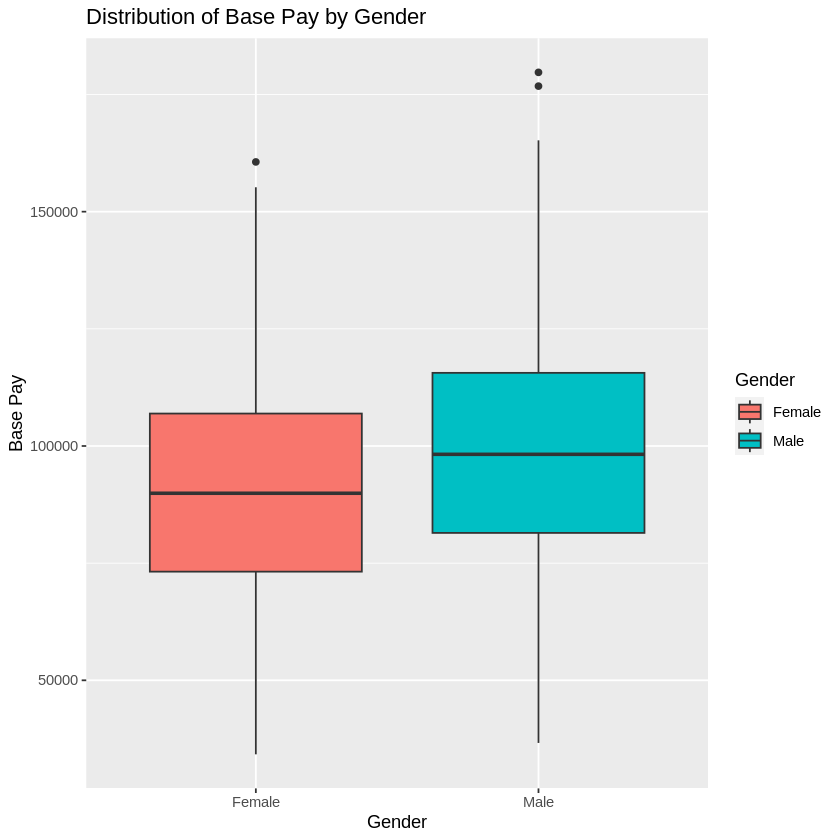

In [26]:
pop_box <- pay_pop |>
    ggplot() +
    geom_boxplot(aes(x = Gender, y = BasePay, fill = Gender)) +
    labs(title = "Distribution of Base Pay by Gender",
       x = "Gender", y = "Base Pay")

pop_plot

<div style="font-style: italic;">
Plot 1: ...
</div>

->not sure if we need a description like this but added it anyways.<-

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


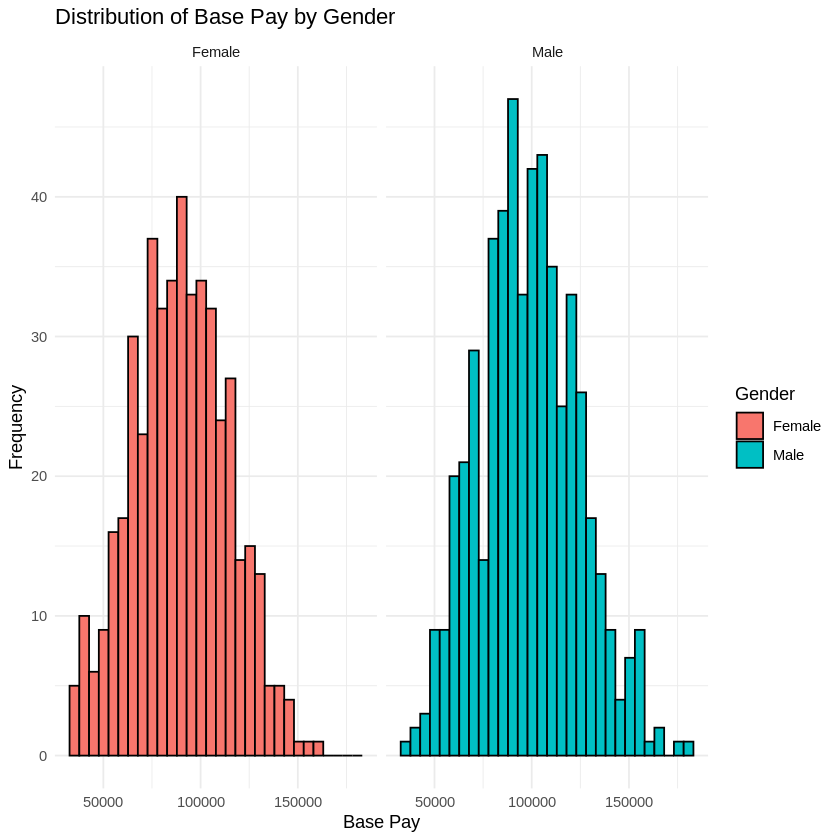

In [25]:
pop_histogram <- pay_pop |>
    ggplot() +
    geom_histogram(aes(x = BasePay, fill = Gender), color = "black") +
    labs(title = "Distribution of Base Pay by Gender",
         x = "Base Pay", y = "Frequency") +
    theme_minimal() +
    facet_wrap(~Gender)

pop_histogram

# Method: Plan


An tidy dataset of sample data, consisting of the gender and the BasePay columns, has been acquired, facilitating the formulation of null and alternate hypotheses tailored to this particular scenario. In light of the prevalent coexistence of both male and female employees in contemporary workplaces, our proposed null and alternate hypotheses take the form of:

$H_0: \mu_{male}-\mu_{female} = 0$ versus $H_1: \mu_{male}-\mu_{female} > 0$.

Subsequently, the observed test statistic is calculated as the disparity in the mean PayGap between the male and female employees, that will be utilized to calculate p-value from the simulated sampling distribution.

### Simulating the sample

from the sample data, we may generate a bootstrap dataset with 5000 reps using specify, hypothesize, generate, and calculate workflow with diff in means as a choosen stat. The P value can subsequently be derived, using the original sample statistics as the observed mean and specifying a right-tailed direction ($\mu_{male}-\mu_{female} > 0$). This systematic approach enables us to make an informed decision regarding whether to accept or reject the null hypothesis ($H_0$) in accordance with the predetermined significance level. 

### Result visualization

A simulated bootstrap sampling distribution will be presented, and within this distribution, the original sample statistic ($\mu_{male}-\mu_{female}$) will function as the observed statistical measure. It will help us gauge the magnitude of this distribution with a focus on the condition $\mu_{male}-\mu_{female} > 0$. The utilization of a histogram is pivotal in comprehending the simulated distribution, as it offers insight into how this distribution aligns with and centers around the original sample statistics.

# References

(put references here)